# Evaluation of modified KNN

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [72]:
df = pd.read_csv('../files_csv/csv_results/combined_metrics.csv')
df.head(10)

,dataset,neighbours,accuracy_sk,accuracy_mod,roc_auc_sk,roc_auc_mod
0,3902,3,0.851871,0.863496,0.555527,0.578715
1,3902,7,0.862839,0.862140,0.520379,0.500564
2,3902,11,0.866949,0.871752,0.515561,0.498872
3,9952,3,0.902109,0.860842,0.871905,0.824264
4,9952,7,0.901928,0.848079,0.871051,0.804197
5,9952,11,0.900630,0.847705,0.869941,0.804287
6,31,3,0.619000,0.631000,0.514524,0.524048
7,31,7,0.652000,0.656000,0.524762,0.522857
8,31,11,0.664000,0.669000,0.521905,0.531190
9,125920,3,0.952000,0.966000,0.541709,0.596875


In [60]:
print(pd.unique(df['dataset']).shape[0]) #Number of diferent datasets

30


In [61]:
df.describe()

,dataset,neighbours,accuracy_sk,accuracy_mod,roc_auc_sk,roc_auc_mod
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,23372.333333,7.000000,0.865398,0.875995,0.740616,0.753355
std,46940.473714,3.284283,0.100463,0.087044,0.180327,0.171839
min,3.000000,3.000000,0.619000,0.631000,0.476492,0.478869
25%,53.000000,3.000000,0.792652,0.819203,0.555180,0.561199
50%,3917.500000,7.000000,0.896893,0.897733,0.756483,0.786128
75%,9978.000000,11.000000,0.934572,0.943798,0.919238,0.919996
max,146822.000000,11.000000,1.000000,0.997086,1.000000,0.997215


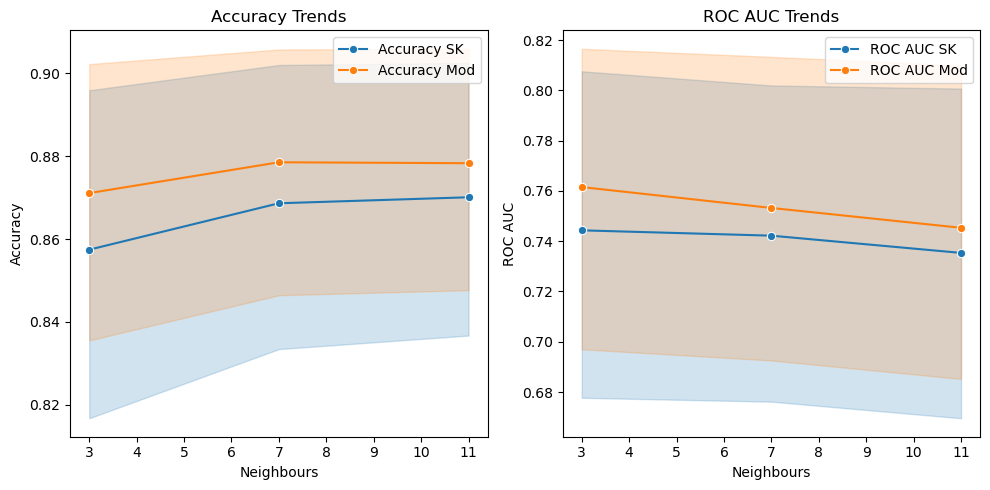

In [62]:
def plot_trends(df):
    plt.figure(figsize=(10, 5))

    # Accuracy trends
    plt.subplot(1, 2, 1)
    sns.lineplot(x='neighbours', y='accuracy_sk', data=df, marker='o', label='Accuracy SK')
    sns.lineplot(x='neighbours', y='accuracy_mod', data=df, marker='o', label='Accuracy Mod')
    plt.xlabel('Neighbours')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Trends')
    plt.legend()
    
    # ROC AUC trends
    plt.subplot(1, 2, 2)
    sns.lineplot(x='neighbours', y='roc_auc_sk', data=df, marker='o', label='ROC AUC SK')
    sns.lineplot(x='neighbours', y='roc_auc_mod', data=df, marker='o', label='ROC AUC Mod')
    plt.xlabel('Neighbours')
    plt.ylabel('ROC AUC')
    plt.title('ROC AUC Trends')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_trends(df)

In [63]:
df_n3=df[df['neighbours'] == 3]
df_n7=df[df['neighbours'] == 7]
df_n11=df[df['neighbours'] == 11]

In [64]:
df_n3.mean()

dataset         23372.333333
neighbours          3.000000
accuracy_sk         0.857443
accuracy_mod        0.871106
roc_auc_sk          0.744313
roc_auc_mod         0.761524
dtype: float64

In [65]:
df_n7.mean()

dataset         23372.333333
neighbours          7.000000
accuracy_sk         0.868651
accuracy_mod        0.878551
roc_auc_sk          0.742195
roc_auc_mod         0.753218
dtype: float64

In [66]:
df_n11.mean()

dataset         23372.333333
neighbours         11.000000
accuracy_sk         0.870100
accuracy_mod        0.878328
roc_auc_sk          0.735340
roc_auc_mod         0.745324
dtype: float64

### Entire dataset overview:
Using the scikit-learn KNN model, the mean accuracy across all datasets and all numbers of neighbors increased by approximately 1%, while the ROC AUC (for multiclass datasets, this is really ROC AUC OVR) increased by approximately 1,3%. These improvements are significant, considering they represent the mean metrics across all 30 datasets analyzed. Now, we should identify the subset of datasets where the model achieves the highest metrics. This will allow us to confidently determine the types of datasets for which the modified KNN performs best.

In [67]:
df['diff_accuracy'] = (df['accuracy_mod'] - df['accuracy_sk'])
df_sorted_acc = df.sort_values(by='diff_accuracy', ascending=False)
df_sorted_acc.head(25)

,dataset,neighbours,accuracy_sk,accuracy_mod,roc_auc_sk,roc_auc_mod,diff_accuracy
51,45,3,0.857367,0.968966,0.861399,0.967798,0.111599
39,37,3,0.700478,0.811176,0.666282,0.781667,0.110697
33,9976,3,0.702692,0.806538,0.702692,0.806538,0.103846
52,45,7,0.869906,0.966458,0.874079,0.965230,0.096552
34,9976,7,0.734615,0.823846,0.734615,0.823846,0.089231
35,9976,11,0.750000,0.833462,0.750000,0.833462,0.083462
53,45,11,0.883386,0.964890,0.887221,0.963619,0.081505
41,37,11,0.738295,0.819036,0.693293,0.787738,0.080742
40,37,7,0.737030,0.817772,0.690732,0.784254,0.080742
22,9971,7,0.732437,0.808007,0.558564,0.668413,0.075570


looking for the datasets with more improvements of accuracy between the default KNN and modified KNN, we can see that the higher gain of accuracy is approximately 8-10%. In general, the dataset more positively influenced are 45,37,9976 and 9971.

In [135]:
df['diff_roc_auc'] = (df['roc_auc_mod'] - df['roc_auc_sk'])
df_sorted_roc = df.sort_values(by='diff_roc_auc', ascending=False)
df_sorted_roc.head(25)

,dataset,neighbours,accuracy_sk,accuracy_mod,roc_auc_sk,roc_auc_mod,diff_roc_auc
18,3560,3,0.855902,0.889984,0.775936,0.915272,0.139336
17,146819,11,0.916667,0.938889,0.519000,0.648980,0.129980
15,146819,3,0.927778,0.944444,0.601959,0.727459,0.125500
39,37,3,0.700478,0.811176,0.666282,0.781667,0.115385
19,3560,7,0.875934,0.854968,0.771316,0.885231,0.113914
22,9971,7,0.732437,0.808007,0.558564,0.668413,0.109848
51,45,3,0.857367,0.968966,0.861399,0.967798,0.106398
33,9976,3,0.702692,0.806538,0.702692,0.806538,0.103846
20,3560,11,0.890997,0.831123,0.756937,0.857778,0.100841
41,37,11,0.738295,0.819036,0.693293,0.787738,0.094444


looking for the datasets with more improvements of roc_auc between the default KNN and modified KNN, we can see that the higher gain of roc_auc is approximately 14%. In general, the dataset more positively influenced are 3560, 146819, 37 and 45.

The datasets 37, 45, 3560, 9976, 3 and 146819 appeared in highest improves on accuracy and roc_auc. 

In [92]:
dataset_37 = pd.read_csv('../files_csv/csv_tests/dataset_37.csv')
dataset_45 = pd.read_csv('../files_csv/csv_tests/dataset_45.csv')
dataset_3560 = pd.read_csv('../files_csv/csv_tests/dataset_3560.csv')
dataset_9976 = pd.read_csv('../files_csv/csv_tests/dataset_9976.csv')
dataset_3 = pd.read_csv('../files_csv/csv_tests/dataset_3.csv')
dataset_146819 = pd.read_csv('../files_csv/csv_tests/dataset_146819.csv')
dataset_9971 = pd.read_csv('../files_csv/csv_tests/dataset_9971.csv')

In [94]:
print('37: ',dataset_37.shape, dataset_37.iloc[:,-1].value_counts())
print('\n3560: ',dataset_3560.shape, dataset_3560.iloc[:,-1].value_counts())
print('\n45: ',dataset_45.shape, dataset_45.iloc[:,-1].value_counts())
print('\n9976: ',dataset_9976.shape, dataset_9976.iloc[:,-1].value_counts())
print('\n3: ',dataset_3.shape, dataset_3.iloc[:,-1].value_counts())
print('\n146819: ',dataset_146819.shape, dataset_146819.iloc[:,-1].value_counts())
print('\n9971: ',dataset_9971.shape, dataset_9971.iloc[:,-1].value_counts())

37:  (768, 9) class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

3560:  (797, 5) Prevention
Mouthwash           155
Diet_enrichment     132
All_methods         127
Health_education    124
Oral_hygiene        123
Name: count, dtype: int64

45:  (3190, 61) Class
N     1655
IE     768
EI     767
Name: count, dtype: int64

9976:  (2600, 501) Class
2    1300
1    1300
Name: count, dtype: int64

3:  (3196, 37) class
won      1669
nowin    1527
Name: count, dtype: int64

146819:  (540, 19) outcome
1    494
0     46
Name: count, dtype: int64

9971:  (583, 11) Class
1    416
2    167
Name: count, dtype: int64


In general,the datasets with more improvements on roc_auc(roc_auc_ovr in multiclass) have some characteristics in specific. First, the most of them have a high number of columns, except the dataset 3560, with 5 columns, 37 with 9 and 997 with 11.

In [95]:
dataset_3560.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DMFT.Begin  797 non-null    int64 
 1   DMFT.End    797 non-null    int64 
 2   Gender      797 non-null    object
 3   Ethnic      797 non-null    object
 4   Prevention  661 non-null    object
dtypes: int64(2), object(3)
memory usage: 31.3+ KB


In [96]:
dataset_3560.head(10)

,DMFT.Begin,DMFT.End,Gender,Ethnic,Prevention
0,6,3,Male,Black,Health_education
1,2,1,Female,Black,Health_education
2,1,0,Male,Black,Health_education
3,7,2,Male,White,Health_education
4,3,3,Female,White,Health_education
5,0,0,Female,Black,Health_education
6,4,3,Male,White,Health_education
7,2,1,Male,White,Health_education
8,8,2,Female,Dark,Health_education
9,3,3,Male,White,Health_education


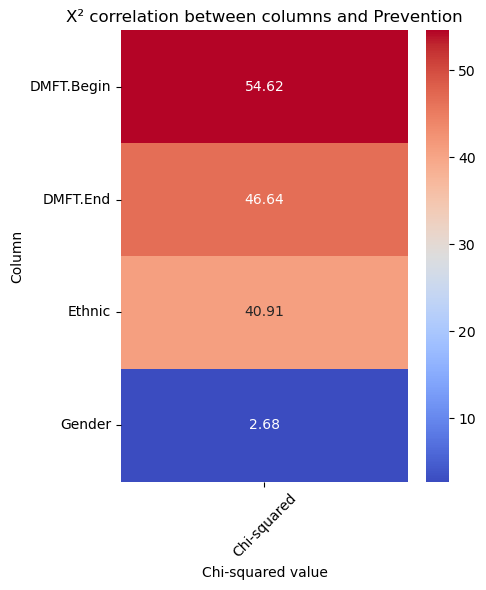

In [117]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer

numeric_cols = ['DMFT.End', 'DMFT.Begin']
categoric_cols = ['Ethnic', 'Gender']
# categoric_cols.append('Prevention')

chi_squared_values = {}

for col in dataset_3560.iloc[:,:-1].columns:
    if col in numeric_cols:  # Handle numeric columns
        kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')
        discretized_col = kbins.fit_transform(dataset_3560[[col]]).astype(int).flatten()
        contingency_table = pd.crosstab(discretized_col, dataset_3560['Prevention'])
    else:  # Handle categorical columns
        contingency_table = pd.crosstab(dataset_3560[col], dataset_3560['Prevention'])
    
    chi2_stat, *_ = chi2_contingency(contingency_table)
    chi_squared_values[col] = chi2_stat

chi_squared_df = pd.DataFrame(list(chi_squared_values.items()), columns=['Column', 'Chi-squared'])
chi_squared_df = chi_squared_df.sort_values(by='Chi-squared', ascending=False)

plt.figure(figsize=(5, 6))
sns.heatmap(chi_squared_df.set_index('Column'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('X² correlation between columns and Prevention')
plt.xlabel('Chi-squared value')
plt.ylabel('Column')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [118]:
dataset_146819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vconst_corr           540 non-null    float64
 1   vconst_2              540 non-null    float64
 2   vconst_3              540 non-null    float64
 3   vconst_4              540 non-null    float64
 4   vconst_5              540 non-null    float64
 5   vconst_7              540 non-null    float64
 6   ah_corr               540 non-null    float64
 7   ah_bolus              540 non-null    float64
 8   slm_corr              540 non-null    float64
 9   efficiency_factor     540 non-null    float64
 10  tidal_mix_max         540 non-null    float64
 11  vertical_decay_scale  540 non-null    float64
 12  convect_corr          540 non-null    float64
 13  bckgrnd_vdc1          540 non-null    float64
 14  bckgrnd_vdc_ban       540 non-null    float64
 15  bckgrnd_vdc_eq        5

In [119]:
dataset_146819.head(10)

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
5,0.041379,0.629026,0.303380,0.813408,0.222817,0.971206,0.609778,0.647804,0.737914,0.440943,0.035982,0.615868,0.017487,0.932320,0.329318,0.954123,0.135379,0.294805,1
6,0.161050,0.548838,0.153583,0.654415,0.140346,0.796646,0.405840,0.662636,0.049427,0.578519,0.264855,0.959217,0.698107,0.467359,0.637078,0.011251,0.147325,0.213814,1
7,0.415299,0.898731,0.931822,0.916648,0.399106,0.009445,0.846257,0.683773,0.397306,0.886768,0.522428,0.694774,0.886522,0.411673,0.481108,0.926546,0.026431,0.092740,1
8,0.166758,0.352972,0.988121,0.287070,0.563626,0.402708,0.380932,0.479191,0.060165,0.236524,0.290484,0.391833,0.254944,0.488400,0.053684,0.862226,0.415055,0.487126,1
9,0.655626,0.413931,0.805288,0.163486,0.861902,0.947595,0.546564,0.426141,0.417080,0.945610,0.325388,0.666527,0.374270,0.100291,0.213290,0.222860,0.007286,0.420027,1


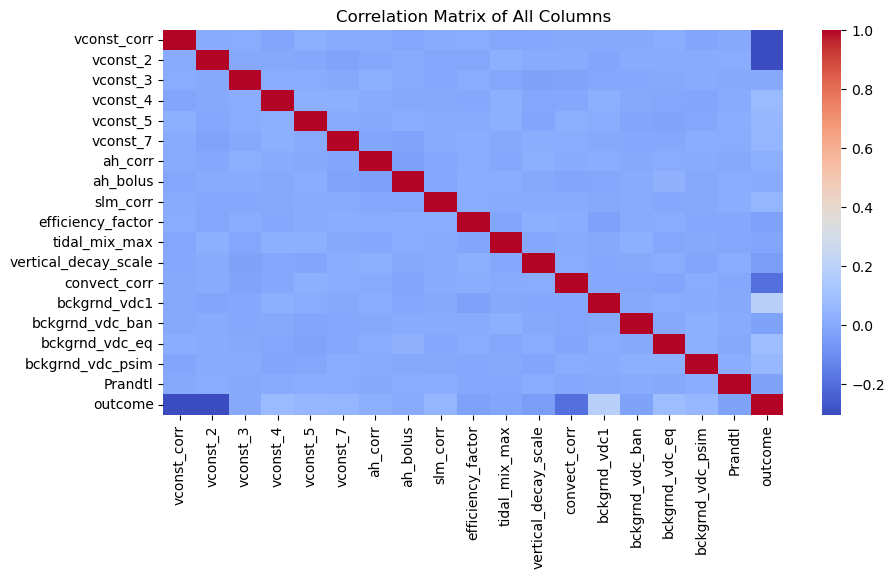

In [121]:
correlation_matrix = dataset_146819.corr(method='pearson')
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()

In [122]:
dataset_37.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


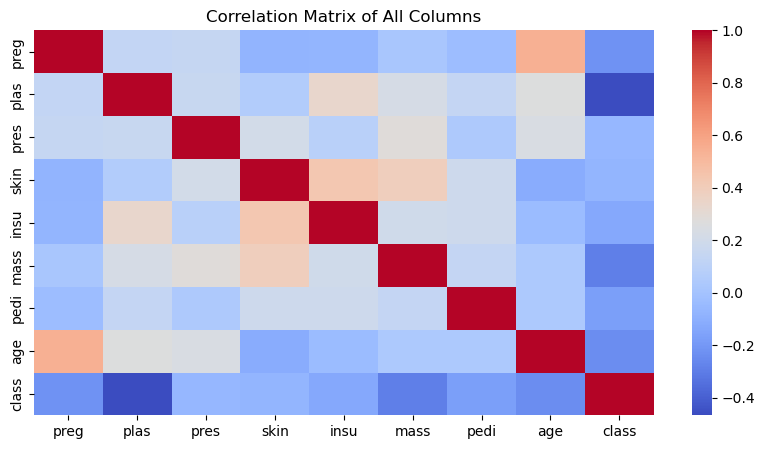

In [148]:
dataset_37['class'] = dataset_37['class'].replace({'tested_positive': 1, 'tested_negative': 2})
correlation_matrix = dataset_37.corr(method='pearson')
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()

chi_squared_values = {}

for col in dataset_45.iloc[:,:-1].columns:
    if col in numeric_cols:  # Handle numeric columns
        kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')
        discretized_col = kbins.fit_transform(dataset_45[[col]]).astype(int).flatten()
        contingency_table = pd.crosstab(discretized_col, dataset_45['Class'])
    else:  # Handle categorical columns
        contingency_table = pd.crosstab(dataset_45[col], dataset_45['Class'])
    
    chi2_stat, *_ = chi2_contingency(contingency_table)
    chi_squared_values[col] = chi2_stat

chi_squared_df = pd.DataFrame(list(chi_squared_values.items()), columns=['Column', 'Chi-squared'])
chi_squared_df = chi_squared_df.sort_values(by='Chi-squared', ascending=False)

plt.figure(figsize=(5, 6))
sns.heatmap(chi_squared_df.set_index('Column'), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('X² correlation between columns and Class')
plt.xlabel('Chi-squared value')
plt.ylabel('Column')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Now, picking the worst gain of metric of roc_auc to see if the correlations between the columns are high.

In [149]:
df_sorted_roc.tail(1)

,dataset,neighbours,accuracy_sk,accuracy_mod,roc_auc_sk,roc_auc_mod,diff_roc_auc
47,3022,11,0.970707,0.946465,0.863889,0.770556,-0.093333


In [139]:
dataset_3022 = pd.read_csv('../files_csv/csv_tests/dataset_3022.csv')
dataset_3022['Class'].value_counts()

Class
hid    90
hId    90
hEd    90
hAd    90
hYd    90
had    90
hOd    90
hod    90
hUd    90
hud    90
hed    90
Name: count, dtype: int64

In [137]:
dataset_3022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Speaker_Number  990 non-null    object 
 1   Sex             990 non-null    object 
 2   Feature_0       990 non-null    float64
 3   Feature_1       990 non-null    float64
 4   Feature_2       990 non-null    float64
 5   Feature_3       990 non-null    float64
 6   Feature_4       990 non-null    float64
 7   Feature_5       990 non-null    float64
 8   Feature_6       990 non-null    float64
 9   Feature_7       990 non-null    float64
 10  Feature_8       990 non-null    float64
 11  Feature_9       990 non-null    float64
 12  Class           990 non-null    object 
dtypes: float64(10), object(3)
memory usage: 100.7+ KB


In [140]:
dataset_3022.head(10)

,Speaker_Number,Sex,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Class
0,Andrew,Male,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,hid
1,Andrew,Male,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,hId
2,Andrew,Male,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,hEd
3,Andrew,Male,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,hAd
4,Andrew,Male,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,hYd
5,Andrew,Male,-2.852,1.914,-0.755,0.825,-1.588,0.855,0.217,-0.246,0.238,-0.365,had
6,Andrew,Male,-3.482,2.524,-0.433,1.048,-1.995,0.902,0.322,0.450,0.377,-0.366,hOd
7,Andrew,Male,-3.941,2.305,0.124,1.771,-1.815,0.593,-0.435,0.992,0.575,-0.301,hod
8,Andrew,Male,-3.860,2.116,-0.939,0.688,-0.675,1.679,-0.512,0.928,-0.167,-0.434,hUd
9,Andrew,Male,-3.648,1.812,-1.378,1.578,0.065,1.577,-0.466,0.702,0.060,-0.836,hud


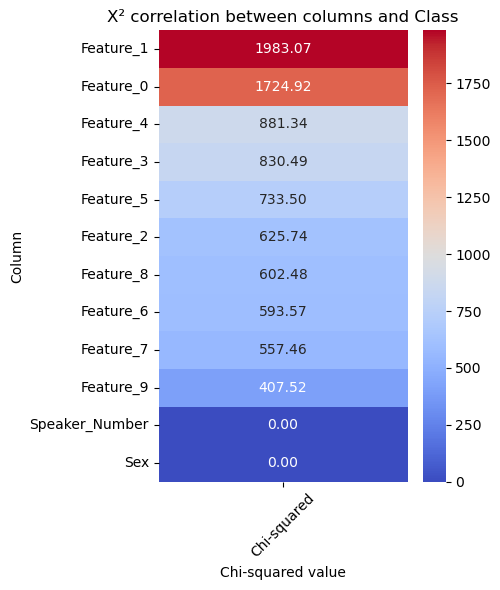

In [146]:
numeric_cols = ['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']

chi_squared_values = {}

for col in dataset_3022.iloc[:,:-1].columns:
    if col in numeric_cols:  # Handle numeric columns
        kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')
        discretized_col = kbins.fit_transform(dataset_3022[[col]]).astype(int).flatten()
        contingency_table = pd.crosstab(discretized_col, dataset_3022['Class'])
    else:  # Handle categorical columns
        contingency_table = pd.crosstab(dataset_3022[col], dataset_3022['Class'])
    
    chi2_stat, *_ = chi2_contingency(contingency_table)
    chi_squared_values[col] = chi2_stat

chi_squared_df = pd.DataFrame(list(chi_squared_values.items()), columns=['Column', 'Chi-squared'])
chi_squared_df = chi_squared_df.sort_values(by='Chi-squared', ascending=False)

plt.figure(figsize=(5, 6))
sns.heatmap(chi_squared_df.set_index('Column'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('X² correlation between columns and Class')
plt.xlabel('Chi-squared value')
plt.ylabel('Column')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Conclusions:
For our modified KNN model, the ideal dataset exhibits lower correlations between its columns and the target variable. In a scenario where our model underperformed compared to sklearn's KNN, we found that all columns had strong correlations with the target. However, without prior exploration of correlations, identifying noisy datasets becomes challenging.

because of that, we have some characteristics observed that can have some impact, as observed, like a high number of columns, but is not a rule.